<h2>Лабораторная работа №4</h2>
<h1 style="font-size: 30px; font-family: Georgia, serif;">Работа с классификацией данных при помощи skikit-learn. Построение модели машинного обучения методом k-средних. </h1>

<h2>1. Оптическое распознавание набора данных рукописных цифр </h2>

<h5> 1. Изучение данных </h5>

Импортирование библиотек и загрузка данных

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_digits
digits_dataset = load_digits()

Создание  объекта DataFrame и вывод первых строк

In [6]:
digits_data = pd.DataFrame(digits_dataset.data, columns=digits_dataset.feature_names)
digits_data.head(15)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


Подсчет уникальных значений в каждом столбце DataFrame

In [7]:
digits_data.value_counts()

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  pixel_1_2  pixel_1_3  pixel_1_4  pixel_1_5  pixel_1_6  pixel_1_7  pixel_2_0  pixel_2_1  pixel_2_2  pixel_2_3  pixel_2_4  pixel_2_5  pixel_2_6  pixel_2_7  pixel_3_0  pixel_3_1  pixel_3_2  pixel_3_3  pixel_3_4  pixel_3_5  pixel_3_6  pixel_3_7  pixel_4_0  pixel_4_1  pixel_4_2  pixel_4_3  pixel_4_4  pixel_4_5  pixel_4_6  pixel_4_7  pixel_5_0  pixel_5_1  pixel_5_2  pixel_5_3  pixel_5_4  pixel_5_5  pixel_5_6  pixel_5_7  pixel_6_0  pixel_6_1  pixel_6_2  pixel_6_3  pixel_6_4  pixel_6_5  pixel_6_6  pixel_6_7  pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  pixel_7_7
0.0        0.0        0.0        0.0        3.0        14.0       3.0        0.0        0.0        0.0        0.0        1.0        14.0       16.0       5.0        0.0        0.0        1.0        9.0        15.0       16.0       16.0       4.0        0.0        0.0        4.0        12.0       

Вывод ключей в digits_dataset

In [8]:
print("Keys digits_dataset: \n{}".format(digits_dataset.keys()))

Keys digits_dataset: 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


Вывод описания digits_dataset

In [9]:
print(digits_dataset['DESCR']+"\n...")

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Имена классов в digits_dataset

In [72]:
print("Name of the classes: {}".format(digits_dataset['target_names']))

Name of the classes: [0 1 2 3 4 5 6 7 8 9]


Вывод типа объекта

In [14]:
print("Type of the data array: {}".format(type(digits_dataset['data'])))
# особенности

Type of the data array: <class 'numpy.ndarray'>


Вывод формы матрицы пикселей

In [15]:
print("The shape of the data array: {}".format(digits_dataset['data'].shape))

The shape of the data array: (1797, 64)


Вывод целевых переменных для каждого изображения

In [16]:
print("Answers:\n{}".format(digits_dataset['target']))

Answers:
[0 1 2 ... 8 9 8]


Вывод строк матрицы пикселей

In [17]:
print("The rows of the data array: \n{}".format(digits_dataset['data']))

The rows of the data array: 
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


Вывод формы массива целевых переменных

In [18]:
print("Type of the target array: {}".format(digits_dataset['target'].shape))

Type of the target array: (1797,)


<h5> 2. Разделите данные на обучающий и тестовые наборы </h5>

Разделение данных на обучающий и тестовый наборы

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_dataset['data'], digits_dataset['target'], test_size=0.2, random_state=0)

Вывод количества обучающих примеров и признаков

In [25]:
print("The shape of X_train: {}".format(X_train.shape))
print("The shape of y_train: {}".format(y_train.shape))

The shape of X_train: (1437, 64)
The shape of y_train: (1437,)


Вывод формы тестовых матрицы признаков и массива целевых переменных

In [27]:
print("The shape of X_test {}".format(X_test.shape))
print("The shape of y_test {}".format(y_test.shape))

The shape of X_test (360, 64)
The shape of y_test (360,)


<h5> 3. Исследуйте данные с помощью визуализации. Подберите нужные параметры графиков </h5>

Отображения изображения 8x8 пикселей для конкретной рукописной цифры

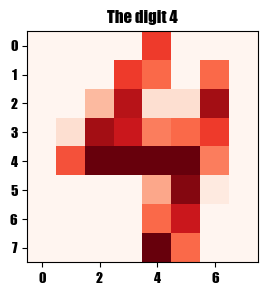

In [103]:
mpl.rcParams['font.family']='fantasy'
image_data = X_train[5]
image_matrix = image_data.reshape(8, 8)

plt.figure(figsize=(3,3)) 
plt.imshow(image_matrix, cmap='Reds', interpolation='nearest')
plt.title(f"The digit {y_train[5]}")
plt.show()

Визуализация того, какие значения пикселей наиболее часто встречаются в данных.

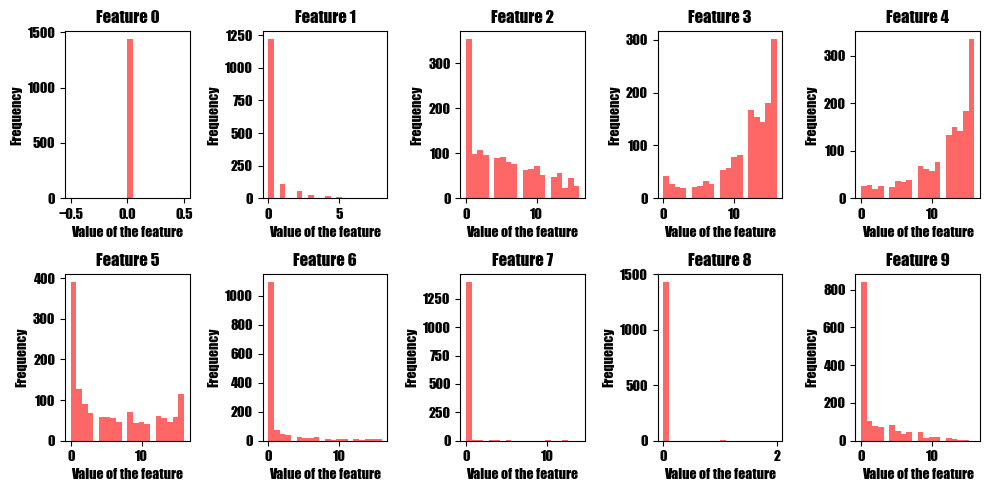

In [104]:
mpl.rcParams['font.family']='fantasy'
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.hist(X_train[:, i], bins=20, color='red', alpha=0.6)
    plt.title(f"Feature {i}")   
    plt.xlabel("Value of the feature")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Подсчитываем уникальные значения в каждом столбце

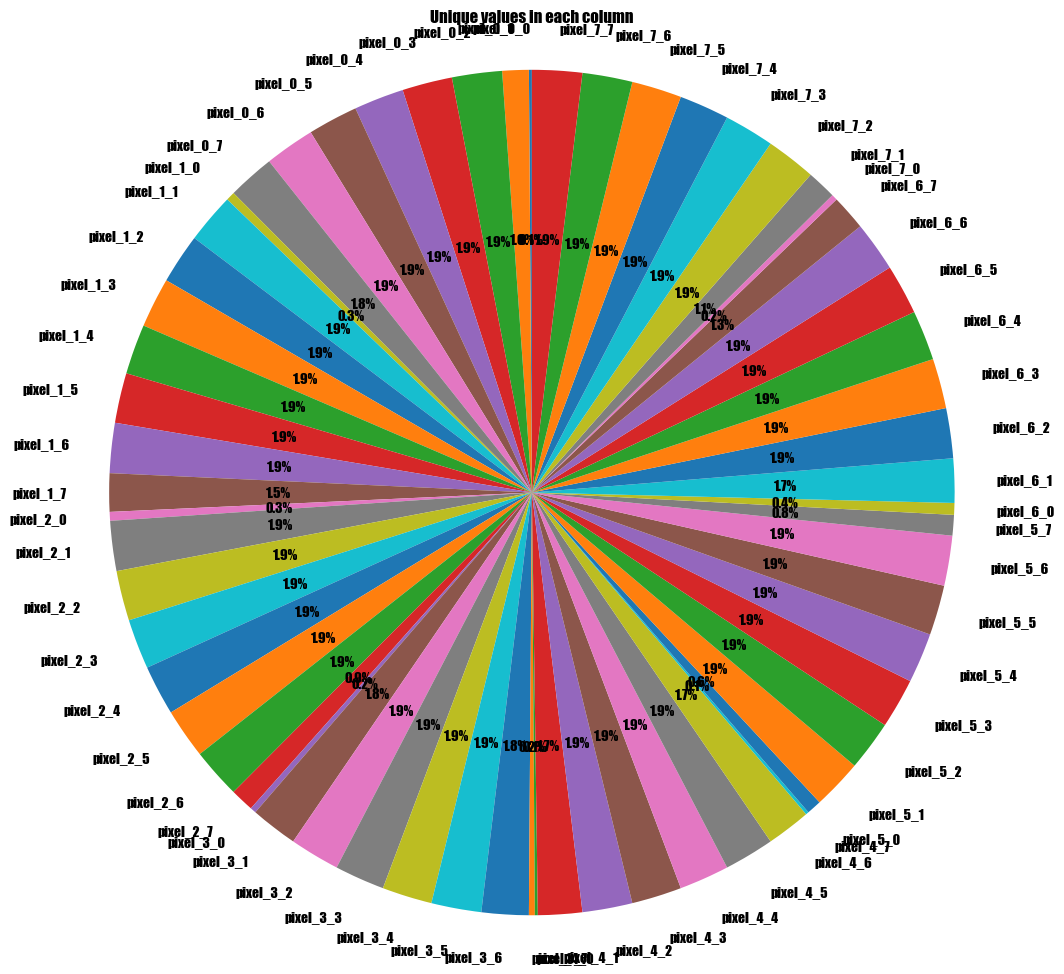

In [113]:
unique_val_c= digits_data.nunique()

labels = unique_val_c.index
values = unique_val_c.values

fig, ax = plt.subplots(figsize=(12, 12))
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal') 

plt.title("Unique values in each column")
plt.show()

<h5> 4. Постройте модель по методу k-ближайших средних </h5>

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

<h5> Протестируйте на произвольном наборе данных </h5>

In [135]:
X_new = np.array([[5, 3, 1, 7, 3, 2, 1, 0, 3, 1, 2, 0, 4, 2, 0, 1, 3, 1, 2, 0, 5, 2, 1, 0, 4, 2, 1, 0, 3, 2, 1, 0, 5, 4, 1, 5, 3, 2, 1, 0, 3, 1, 2, 0, 4, 2, 0, 1, 3, 1, 2, 0, 5, 2, 1, 0, 4, 2, 1, 0, 3, 2, 1, 0]])

print("Shape of the X_new array {}".format(X_new.shape))

Shape of the X_new array (1, 64)


<h5> 5. Получите прогноз модели </h5>

In [136]:
prediction = knn.predict(X_new)
print("Target class forecast: {}".format(prediction))

Target class forecast: [1]


<h5> 6. Оцените качество модели </h5>

In [140]:
y_pred = knn.predict(X_test)
print("Prediction for test set: \n{}".format(y_pred))

Prediction for test set: 
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 3 4 8 7 0 6 1 5 3 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 1 9 3 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 2 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 5 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8]


In [141]:
print("Correctness on the test set: {:.2f}".format(np.mean(y_pred == y_test)))

Correctness on the test set: 0.98


In [141]:
print("Hello")